In [1]:
import scanpy as sc
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
res_methods = {
    "method": [],
    "f1_score": [],
    "fn": [],
    "fp": [],
    "tn": [],
    "tp": [],
}
mappings = {'Singlet': 0, "Doublet": 1}

res_image_based = sc.read_h5ad("./expression/results/image-based/adata_img5_wPreds.h5ad")
res_image_based = res_image_based[res_image_based.obs["class"].notnull() & 
                                  (res_image_based.obs["class"] != "Missing") &
                                  (res_image_based.obs["difficult"] == False)]
res_image_based.obs.loc[res_image_based.obs["pred_image_class"] == "Missing", "pred_image_class"] = "Singlet"
res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
res_image_based.obs["pred_image_class"] = res_image_based.obs["pred_image_class"].map(mappings)
f1_image_based = f1_score(res_image_based.obs["class"], res_image_based.obs["pred_image_class"])
res_methods["method"].append("Image-based")
res_methods["f1_score"].append(f1_image_based)
tn, fp, fn, tp = confusion_matrix(res_image_based.obs["class"], res_image_based.obs["pred_image_class"]).ravel()
res_methods["fn"].append(fn)
res_methods["fp"].append(fp)
res_methods["tn"].append(tn)
res_methods["tp"].append(tp)

res_image_based = sc.read_h5ad("./expression/results/image-based/adata_img5_wPreds_fromloocv.h5ad")
res_image_based = res_image_based[res_image_based.obs["class"].notnull() & 
                                  (res_image_based.obs["class"] != "Missing") &
                                  (res_image_based.obs["difficult"] == False)]
res_image_based.obs.loc[res_image_based.obs["pred_image_class"] == "Missing", "pred_image_class"] = "Singlet"
res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
res_image_based.obs["pred_image_class"] = res_image_based.obs["pred_image_class"].map(mappings)
f1_image_based = f1_score(res_image_based.obs["class"], res_image_based.obs["pred_image_class"])
res_methods["method"].append("Image-based-loocv")
res_methods["f1_score"].append(f1_image_based)
tn, fp, fn, tp = confusion_matrix(res_image_based.obs["class"], res_image_based.obs["pred_image_class"]).ravel()
res_methods["fn"].append(fn)
res_methods["fp"].append(fp)
res_methods["tn"].append(tn)
res_methods["tp"].append(tp)

evals = []
res_doubletdetection = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img5_noMissing.h5ad")
evals += [v for k, v in res_doubletdetection.uns.items() if k != "hvg"]
res_doubletdetection = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img5.h5ad")
evals += [v for k, v in res_doubletdetection.uns.items() if k != "hvg"]
f1s = [v["f1_score"] for v in evals]
f1_doubletdetection = np.max(f1s)
res_methods["method"].append("DoubletDetection")
res_methods["f1_score"].append(f1_doubletdetection)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

evals = []
res_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img5.h5ad")
evals += [v for k, v in res_scrublet.uns.items() if k != "hvg"]
res_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img5_noMissing.h5ad")
evals += [v for k, v in res_scrublet.uns.items() if k != "hvg"]
f1s = [v["f1_score"] for v in evals]
f1_scrublet = np.max(f1s)
res_methods["method"].append("Scrublet")
res_methods["f1_score"].append(f1_scrublet)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

evals = []
res_solo = sc.read_h5ad("./expression/results/solo/solo_img5.h5ad")
evals += [v for k, v in res_solo.uns.items() if k != "hvg" and isinstance(v, dict)]
res_solo = sc.read_h5ad("./expression/results/solo/solo_img5_noMissing.h5ad")
evals += [v for k, v in res_solo.uns.items() if k != "hvg" and isinstance(v, dict)]
f1s = [v["f1_score"] for v in evals]
f1_solo = np.max(f1s)
res_methods["method"].append("Solo")
res_methods["f1_score"].append(f1_solo)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

/tmp/ipykernel_31619/3879070272.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
/tmp/ipykernel_31619/3879070272.py:32: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)


In [3]:
res_scDblFinder = pd.read_csv("./expression/results/scDblFinder/scDblFinder/scores.csv", index_col=0)
idx = [i for i in res_scDblFinder.index if "img5" in i]
f1_scDblFinder = res_scDblFinder.loc[idx, "f1"].max()
res_methods["method"].append("scDblFinder")
res_methods["f1_score"].append(f1_scDblFinder)
res_methods["fn"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "fn"].values[0])
res_methods["fp"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "fp"].values[0])
res_methods["tn"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "tn"].values[0])
res_methods["tp"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "tp"].values[0])

res_scds = pd.read_csv("./expression/results/scds/scds/scores.csv", index_col=0)
idx = [i for i in res_scds.index if "img5" in i]
f1_scds = res_scds.loc[idx, "f1"].max()
res_methods["method"].append("scds")
res_methods["f1_score"].append(f1_scds)
res_methods["fn"].append(res_scds.loc[res_scds.f1 == f1_scds, "fn"].values[0])
res_methods["fp"].append(res_scds.loc[res_scds.f1 == f1_scds, "fp"].values[0])
res_methods["tn"].append(res_scds.loc[res_scds.f1 == f1_scds, "tn"].values[0])
res_methods["tp"].append(res_scds.loc[res_scds.f1 == f1_scds, "tp"].values[0])

res_doubletfinder = pd.read_csv("./expression/results/DoubletFinder/DoubletFinder/scores.csv", index_col=0)
idx = [i for i in res_doubletfinder.index if "img5" in i]
f1_doubletfinder = res_doubletfinder.loc[idx, "f1"].max()
res_methods["method"].append("DoubletFinder")
res_methods["f1_score"].append(f1_doubletfinder)
res_methods["fn"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "fn"].values[0])
res_methods["fp"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "fp"].values[0])
res_methods["tn"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "tn"].values[0])
res_methods["tp"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "tp"].values[0])

In [4]:
res_methods = pd.DataFrame(res_methods).sort_values("f1_score", ascending=False)
res_methods.to_csv("./Figure4/res_methods_img5.csv", index=False)

/tmp/ipykernel_33897/1225464122.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)


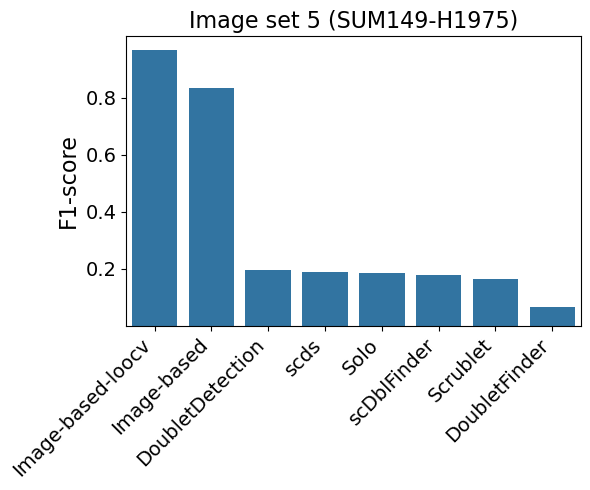

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# reduce the bar width
sns.barplot(data=res_methods, x="method", y="f1_score", ax=ax)
ax.set_ylabel("F1-score", fontsize=16)
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_title("Image set 5 (SUM149-H1975)", fontsize=16)
plt.tight_layout()
plt.savefig("Figure4/f1_scores_img5_wloocv.png", dpi=300)

In [6]:
res_methods = {
    "method": [],
    "f1_score": [],
    "fn": [],
    "fp": [],
    "tn": [],
    "tp": [],
}
mappings = {'Singlet': 0, "Doublet": 1}

res_image_based = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
res_image_based = res_image_based[res_image_based.obs["class"].notnull() & 
                                  (res_image_based.obs["class"] != "Missing") &
                                  (res_image_based.obs["difficult"] == False)]
res_image_based.obs.loc[res_image_based.obs["pred_image_class"] == "Missing", "pred_image_class"] = "Singlet"
res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
res_image_based.obs["pred_image_class"] = res_image_based.obs["pred_image_class"].map(mappings)
f1_image_based = f1_score(res_image_based.obs["class"], res_image_based.obs["pred_image_class"])
res_methods["method"].append("Image-based")
res_methods["f1_score"].append(f1_image_based)
tn, fp, fn, tp = confusion_matrix(res_image_based.obs["class"], res_image_based.obs["pred_image_class"]).ravel()
res_methods["fn"].append(fn)
res_methods["fp"].append(fp)
res_methods["tn"].append(tn)
res_methods["tp"].append(tp)

res_image_based = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds_fromloocv.h5ad")
res_image_based = res_image_based[res_image_based.obs["class"].notnull() & 
                                  (res_image_based.obs["class"] != "Missing") &
                                  (res_image_based.obs["difficult"] == False)]
res_image_based.obs.loc[res_image_based.obs["pred_image_class"] == "Missing", "pred_image_class"] = "Singlet"
res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
res_image_based.obs["pred_image_class"] = res_image_based.obs["pred_image_class"].map(mappings)
f1_image_based = f1_score(res_image_based.obs["class"], res_image_based.obs["pred_image_class"])
res_methods["method"].append("Image-based-loocv")
res_methods["f1_score"].append(f1_image_based)
tn, fp, fn, tp = confusion_matrix(res_image_based.obs["class"], res_image_based.obs["pred_image_class"]).ravel()
res_methods["fn"].append(fn)
res_methods["fp"].append(fp)
res_methods["tn"].append(tn)
res_methods["tp"].append(tp)

evals = []
res_doubletdetection = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img11_noMissing.h5ad")
evals += [v for k, v in res_doubletdetection.uns.items() if k != "hvg"]
res_doubletdetection = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img11.h5ad")
evals += [v for k, v in res_doubletdetection.uns.items() if k != "hvg"]
f1s = [v["f1_score"] for v in evals]
f1_doubletdetection = np.max(f1s)
res_methods["method"].append("DoubletDetection")
res_methods["f1_score"].append(f1_doubletdetection)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

evals = []
res_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img11.h5ad")
evals += [v for k, v in res_scrublet.uns.items() if k != "hvg"]
res_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img11_noMissing.h5ad")
evals += [v for k, v in res_scrublet.uns.items() if k != "hvg"]
f1s = [v["f1_score"] for v in evals]
f1_scrublet = np.max(f1s)
res_methods["method"].append("Scrublet")
res_methods["f1_score"].append(f1_scrublet)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

evals = []
res_solo = sc.read_h5ad("./expression/results/solo/solo_img11.h5ad")
evals += [v for k, v in res_solo.uns.items() if k != "hvg" and isinstance(v, dict)]
res_solo = sc.read_h5ad("./expression/results/solo/solo_img11_noMissing.h5ad")
evals += [v for k, v in res_solo.uns.items() if k != "hvg" and isinstance(v, dict)]
f1s = [v["f1_score"] for v in evals]
f1_solo = np.max(f1s)
res_methods["method"].append("Solo")
res_methods["f1_score"].append(f1_solo)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

/tmp/ipykernel_33897/1708661786.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
/tmp/ipykernel_33897/1708661786.py:32: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)


In [7]:
res_scDblFinder = pd.read_csv("./expression/results/scDblFinder/scDblFinder/scores.csv", index_col=0)
idx = [i for i in res_scDblFinder.index if "img11" in i]
f1_scDblFinder = res_scDblFinder.loc[idx, "f1"].max()
res_methods["method"].append("scDblFinder")
res_methods["f1_score"].append(f1_scDblFinder)
res_methods["fn"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "fn"].values[0])
res_methods["fp"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "fp"].values[0])
res_methods["tn"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "tn"].values[0])
res_methods["tp"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "tp"].values[0])

res_scds = pd.read_csv("./expression/results/scds/scds/scores.csv", index_col=0)
idx = [i for i in res_scds.index if "img11" in i]
f1_scds = res_scds.loc[idx, "f1"].max()
res_methods["method"].append("scds")
res_methods["f1_score"].append(f1_scds)
res_methods["fn"].append(res_scds.loc[res_scds.f1 == f1_scds, "fn"].values[0])
res_methods["fp"].append(res_scds.loc[res_scds.f1 == f1_scds, "fp"].values[0])
res_methods["tn"].append(res_scds.loc[res_scds.f1 == f1_scds, "tn"].values[0])
res_methods["tp"].append(res_scds.loc[res_scds.f1 == f1_scds, "tp"].values[0])

res_doubletfinder = pd.read_csv("./expression/results/DoubletFinder/DoubletFinder/scores.csv", index_col=0)
idx = [i for i in res_doubletfinder.index if "img11" in i]
f1_doubletfinder = res_doubletfinder.loc[idx, "f1"].max()
res_methods["method"].append("DoubletFinder")
res_methods["f1_score"].append(f1_doubletfinder)
res_methods["fn"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "fn"].values[0])
res_methods["fp"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "fp"].values[0])
res_methods["tn"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "tn"].values[0])
res_methods["tp"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "tp"].values[0])

In [8]:
res_methods = pd.DataFrame(res_methods).sort_values("f1_score", ascending=False)
res_methods.to_csv("./Figure4/res_methods_img11.csv", index=False)

/tmp/ipykernel_33897/1917791806.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)


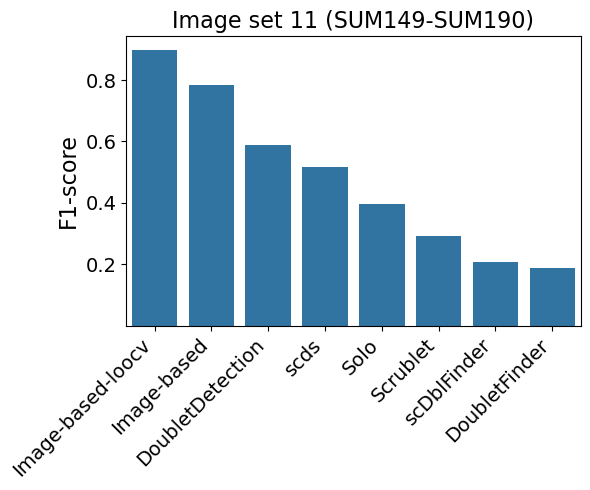

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# reduce the bar width
sns.barplot(data=res_methods, x="method", y="f1_score", ax=ax)
ax.set_ylabel("F1-score", fontsize=16)
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_title("Image set 11 (SUM149-SUM190)", fontsize=16)
plt.tight_layout()
plt.savefig("Figure4/f1_scores_img11_wloocv.png", dpi=300)

#### UMAPs of expression: for Figure 3, with missings

Difficults are included

In [12]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img5_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull(), ]
adata = adata[adata.obs["class"].notnull(), ]
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata, n_components=2)

umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data["class"] = adata.obs["class"]
umap_data["pred_image_class"] = adata.obs["pred_image_class"]
# umap_data.to_csv("./Figure3/umap_data_img5.csv", index=False)
umap_data.to_csv("./Figure3/umap_data_img5_gtnotnull.csv", index=False)

/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:544: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


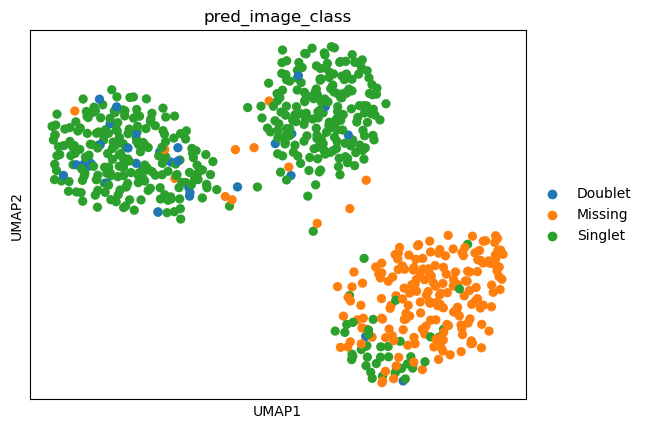

In [13]:
sc.pl.umap(adata, color=["pred_image_class"], na_in_legend=False, projection="2d")

In [14]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull(), ]
adata = adata[adata.obs["class"].notnull(), ]
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)

umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data["class"] = adata.obs["class"]
umap_data["pred_image_class"] = adata.obs["pred_image_class"]
# umap_data.to_csv("./Figure3/umap_data_img11.csv", index=False)
umap_data.to_csv("./Figure3/umap_data_img11_gtnotnull.csv", index=False)

/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:544: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


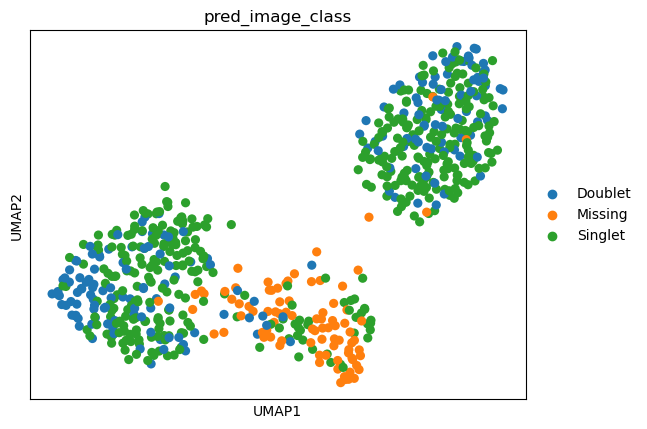

In [15]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sc.pl.umap(adata, color=["pred_image_class"], na_in_legend=False, projection="2d")

#### UMAPs of expression: for Figure 4, without missings

In [19]:

adata = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull() & (adata.obs["class"] != "Missing"), ]
adata = adata[adata.obs["class"].notnull() & (adata.obs["class"] != "Missing") & (~adata.obs["difficult"]), ]

adata_dd = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img11.h5ad")
adata_dd = adata_dd[adata.obs.index, ]
adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0631_vote_thresh_0.3"]

adata_solo = sc.read_h5ad("./expression/results/solo/solo_img11.h5ad")
adata_solo = adata_solo[adata.obs.index, ]
adata.obs["pred_solo"] = adata_solo.obs["preds_min_cells_1_n_top_genes_5000"]

adata_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img11_noMissing.h5ad")
adata_scrublet = adata_scrublet[adata.obs.index, ]
adata.obs["pred_scrublet"] = adata_scrublet.obs["preds_doublets_thresh_0.06"]

scds = pd.read_csv("./expression/results/scds/scds/scds_img11_doublet_scores_noMissing.csv", index_col=0)
scds["pred_scds"] = scds["hybrid_score"].apply(lambda x: "doublet" if x > 0.3 else "singlet")
scds = scds.set_index("image_pos")
scds = scds.loc[adata.obs.index]
adata.obs["pred_scds"] = scds["pred_scds"]

scdblfinder = pd.read_csv("expression/results/scDblFinder/scDblFinder/results_img11.csv", index_col=0)
scdblfinder = scdblfinder.loc[adata.obs.index]
adata.obs["pred_scDblFinder"] = scdblfinder["scDblFinder.class"]

doubletfinder = pd.read_csv("expression/results/DoubletFinder/DoubletFinder/results_img11.csv", index_col=0)
doubletfinder = doubletfinder.loc[adata.obs.index]
adata.obs["pred_doubletfinder"] = doubletfinder["DF.classifications_0.25_0.06_41"]

/tmp/ipykernel_37017/2128160478.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0631_vote_thresh_0.3"]


/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/dengk

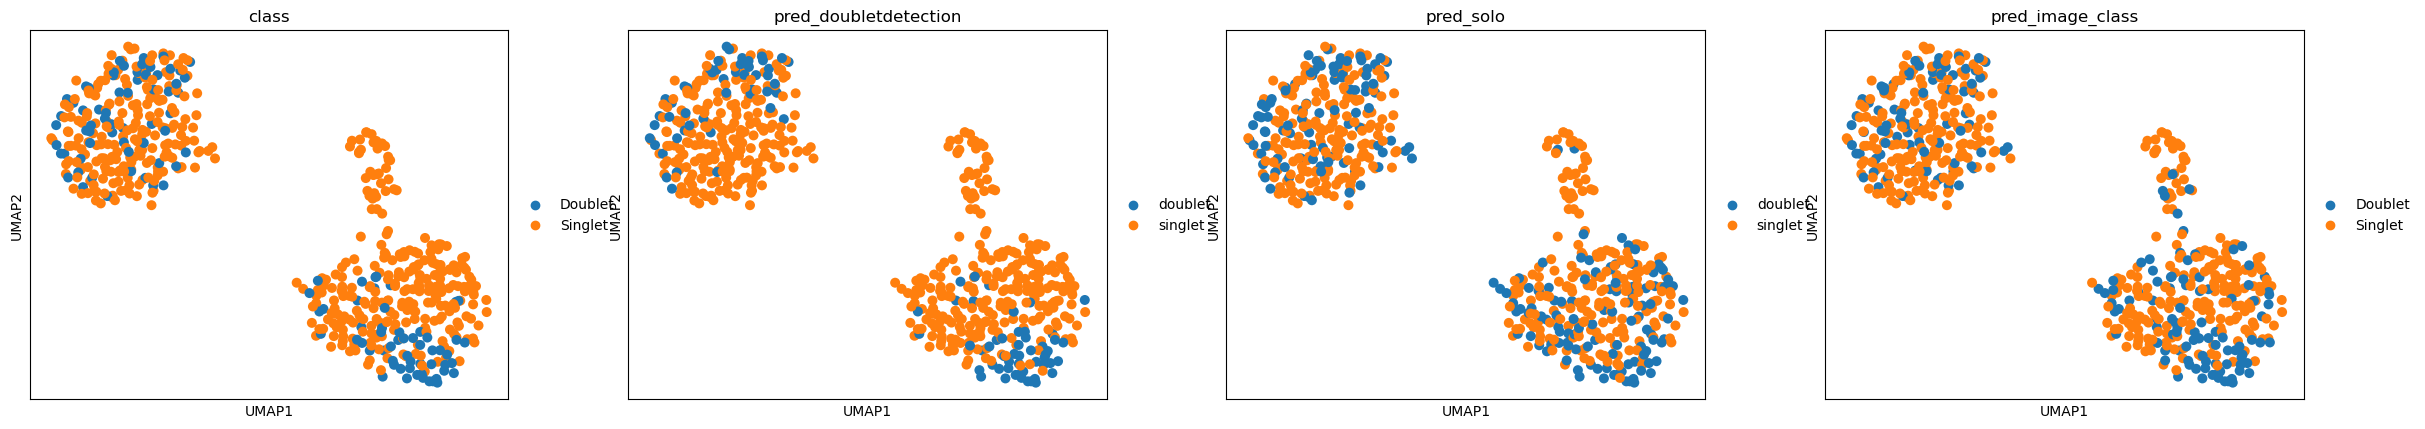

In [20]:
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["class", "pred_doubletdetection", "pred_solo", "pred_image_class"], na_in_legend=False)

In [30]:
preds_on_doublets = adata.obs[(adata.obs["class"] == "Singlet")].iloc[:, -6:]
preds_on_doublets = preds_on_doublets.apply(lambda x: x.str.lower())
(preds_on_doublets == "doublet").all().sum()

0

In [16]:
umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data = pd.concat([umap_data, adata.obs], axis=1, ignore_index=False)
# umap_data.to_csv("./Figure4/umap_data_img11.csv")
umap_data.to_csv("./Figure4/umap_data_img11_gtnotnull.csv")

In [17]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img5_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull() & (adata.obs["class"] != "Missing"), ]
adata = adata[adata.obs["class"].notnull() & (adata.obs["class"] != "Missing"), ]

adata_dd = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img5_noMissing.h5ad")
adata_dd = adata_dd[adata.obs.index, ]
adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0251_vote_thresh_0.4"]

adata_solo = sc.read_h5ad("./expression/results/solo/solo_img5_noMissing.h5ad")
adata_solo = adata_solo[adata.obs.index, ]
adata.obs["pred_solo"] = adata_solo.obs["preds_min_cells_10_n_top_genes_all"]

adata_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img5_noMissing.h5ad")
adata_scrublet = adata_scrublet[adata.obs.index, ]
adata.obs["pred_scrublet"] = adata_scrublet.obs["preds_doublets_thresh_0.06"]

scds = pd.read_csv("./expression/results/scds/scds/scds_img5_doublet_scores_noMissing.csv", index_col=0)
scds["pred_scds"] = scds["hybrid_score"].apply(lambda x: "doublet" if x > 0.5 else "singlet")
scds = scds.set_index("image_pos")
scds = scds.loc[adata.obs.index]
adata.obs["pred_scds"] = scds["pred_scds"]

scdblfinder = pd.read_csv("expression/results/scDblFinder/scDblFinder/results_img5.csv", index_col=0)
scdblfinder = scdblfinder.loc[adata.obs.index]
adata.obs["pred_scDblFinder"] = scdblfinder["scDblFinder.class"]

doubletfinder = pd.read_csv("expression/results/DoubletFinder/DoubletFinder/results_img5_noMissing.csv", index_col=0)
doubletfinder = doubletfinder.loc[adata.obs.index]
adata.obs["pred_doubletfinder"] = doubletfinder["DF.classifications_0.25_0.07_31"]

/tmp/ipykernel_10285/3303040401.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0251_vote_thresh_0.4"]


/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/dengk

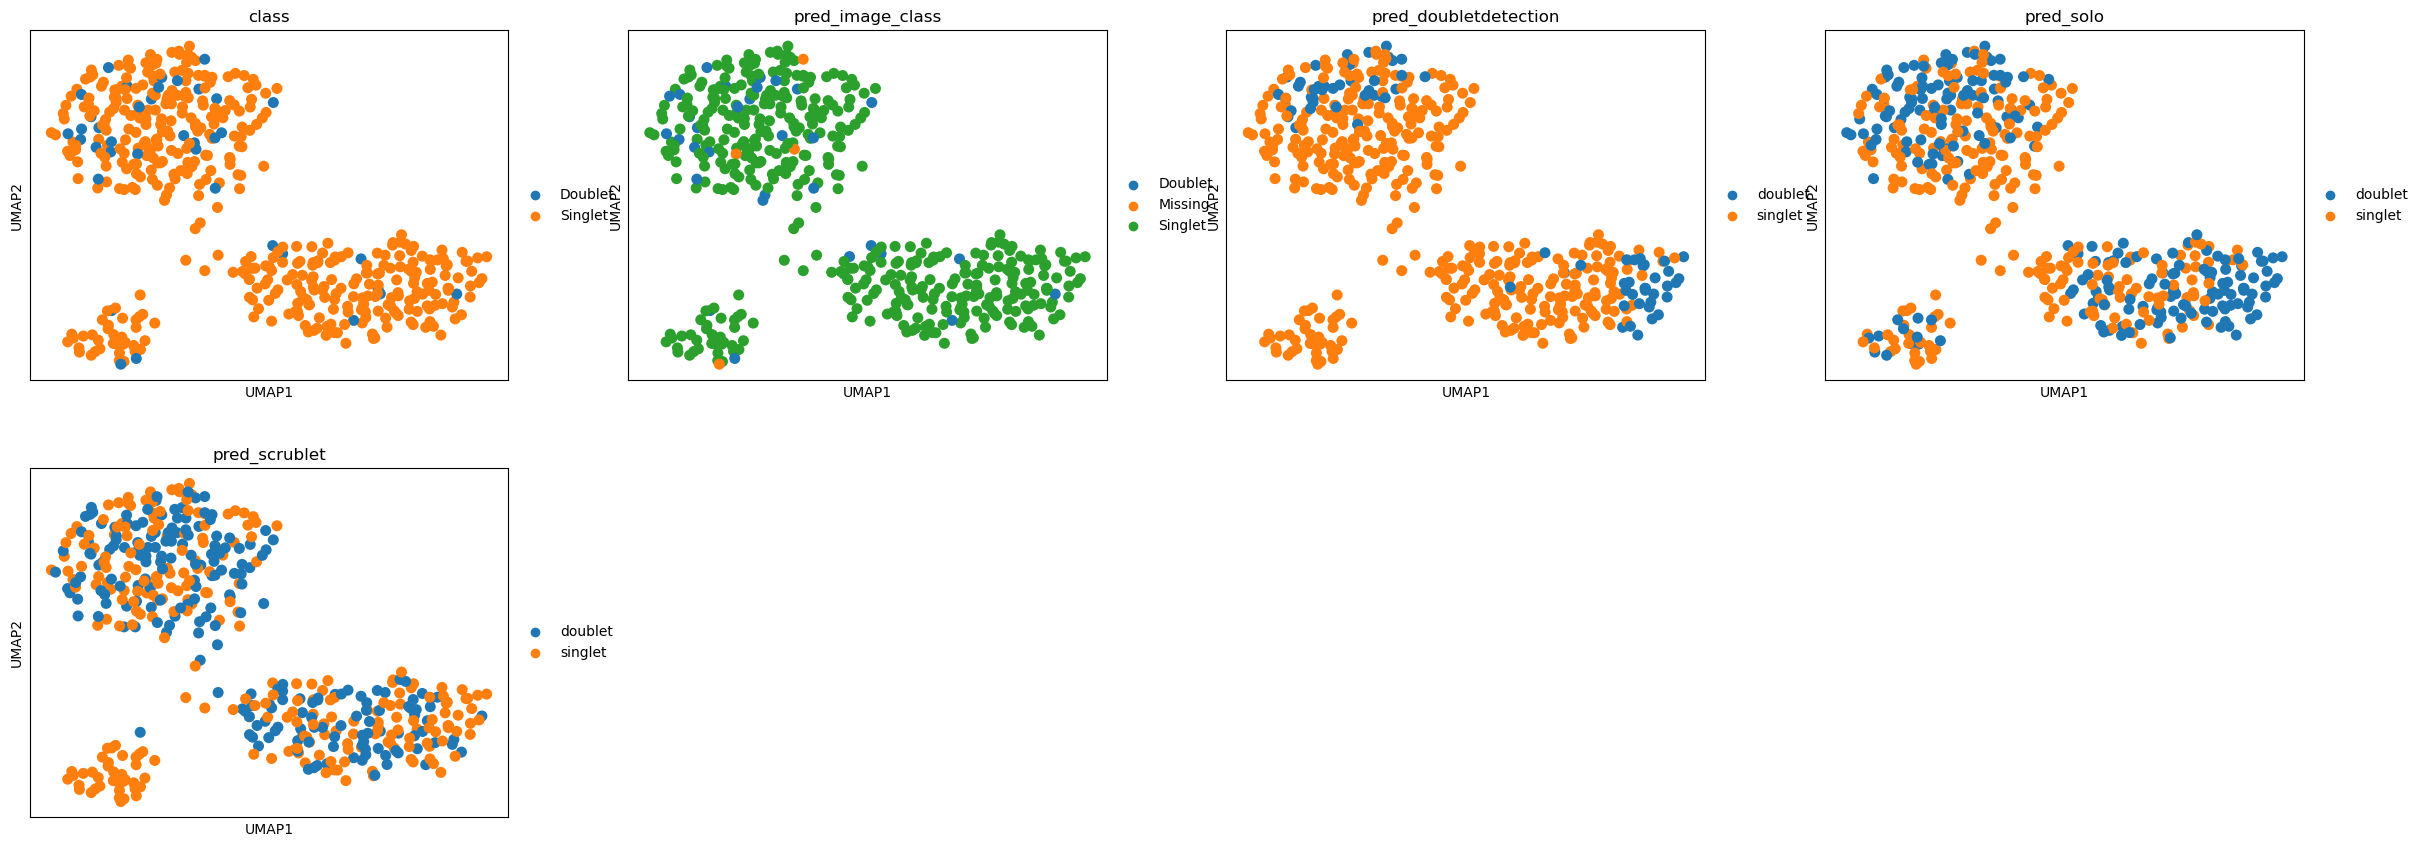

In [18]:
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["class", "pred_image_class", "pred_doubletdetection", "pred_solo", "pred_scrublet"], na_in_legend=False)

In [19]:
umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data = pd.concat([umap_data, adata.obs], axis=1, ignore_index=False)
# umap_data.to_csv("./Figure4/umap_data_img5.csv")
umap_data.to_csv("./Figure4/umap_data_img5_gtnotnull.csv")

In [1]:
solo = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img5_noMissing.h5ad")
scores = solo.uns
del scores["hvg"]
# del scores["_scvi_manager_uuid"]
# del scores["_scvi_uuid"]
sorted_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1]['f1_score'], reverse=True)}
sorted_scores

NameError: name 'sc' is not defined

In [96]:
scores = pd.read_csv("expression/results/scDblFinder/scDblFinder/scores.csv", index_col=0)
scores = scores[scores.index.str.contains("img5")].sort_values(by="f1", ascending=False)
doubletfinder = pd.read_csv("expression/results/DoubletFinder/DoubletFinder/results_img5_noMissing.csv", index_col=0)

In [97]:
scores

,accuracy,f1,tn,fn,fp,tp,method
score_img5,0.892857,0.190476,419,32,19,6,scDblFinder
score_img5_noMissing,0.892857,0.105263,422,35,16,3,scDblFinder


#### UMAP for expression: before or after keeping the missing and doublets

/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:544: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' f

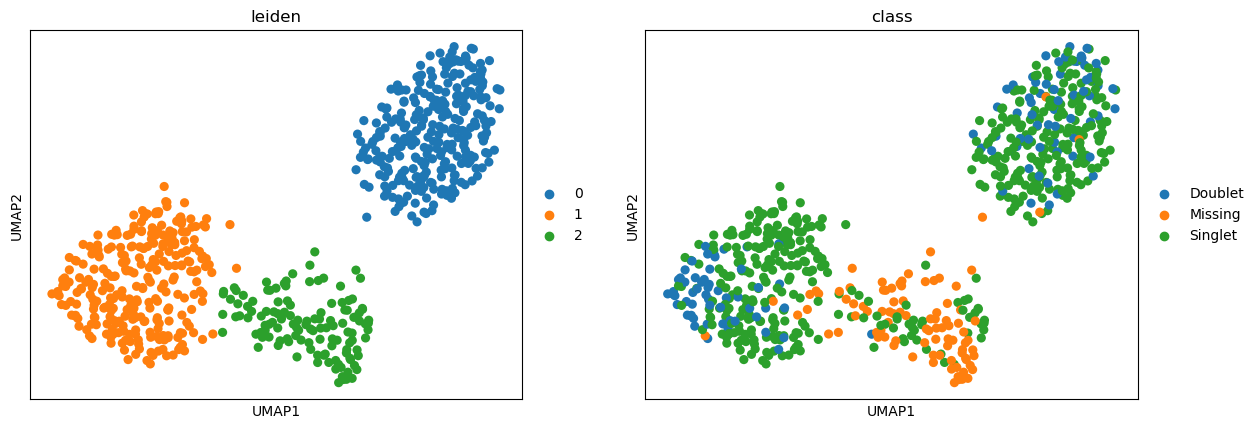

In [8]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull(), ]
adata = adata[adata.obs["class"].notnull(), ]
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata, n_components=2)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color=['leiden', "class"])

/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:544: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' f

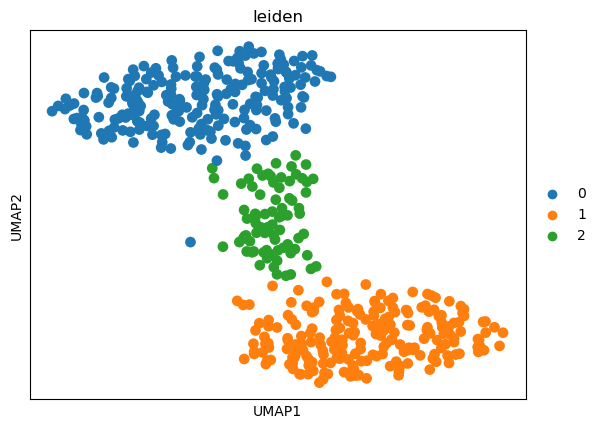

In [9]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull(), ]
adata = adata[adata.obs["pred_image_class"].notnull() & (adata.obs["pred_image_class"] == "Singlet"), ]
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata, n_components=2)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color=['leiden'])